In [1]:
import tensorflow as tf 
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt 


In [2]:
import os
import pandas as pd 

mdata =pd.read_csv('donnees-synop-essentielles-omm-LYS.csv',sep=';')
mdata.head(5)

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Longitude,Latitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code)
0,7481,2015-06-12T17:00:00+02:00,101050.0,-230.0,6.0,140.0,3.6,297.35,286.25,50.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84
1,7481,2015-06-05T17:00:00+02:00,101590.0,-220.0,8.0,190.0,3.9,305.75,286.95,32.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84
2,7481,2015-06-15T11:00:00+02:00,101420.0,90.0,1.0,270.0,1.5,293.95,286.85,64.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84
3,7481,2015-06-15T14:00:00+02:00,101430.0,20.0,1.0,10.0,2.5,295.95,286.45,55.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84
4,7481,2015-06-20T05:00:00+02:00,102030.0,0.0,4.0,50.0,0.7,285.95,282.95,82.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84


In [3]:
mdata.sort_values(['Date'],inplace=True)
mdata.head(6)

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Longitude,Latitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code)
501,7481,2010-01-01T01:00:00+01:00,99080.0,-120.0,6.0,0.0,0.0,280.65,278.75,88.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84
502,7481,2010-01-01T04:00:00+01:00,98940.0,-150.0,6.0,60.0,1.0,279.75,278.65,93.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84
26379,7481,2010-01-01T07:00:00+01:00,98950.0,10.0,3.0,280.0,2.1,279.55,278.85,95.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84
6823,7481,2010-01-01T10:00:00+01:00,99180.0,230.0,3.0,310.0,2.6,279.75,279.15,96.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84
19892,7481,2010-01-01T13:00:00+01:00,99480.0,280.0,1.0,330.0,4.6,279.05,278.15,94.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84
3589,7481,2010-01-01T16:00:00+01:00,99980.0,480.0,3.0,350.0,5.1,278.35,276.95,91.0,...,5.077833,45.7265,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575,Rhône,69,Auvergne-Rhône-Alpes,84


(29165, 81)


<AxesSubplot:>

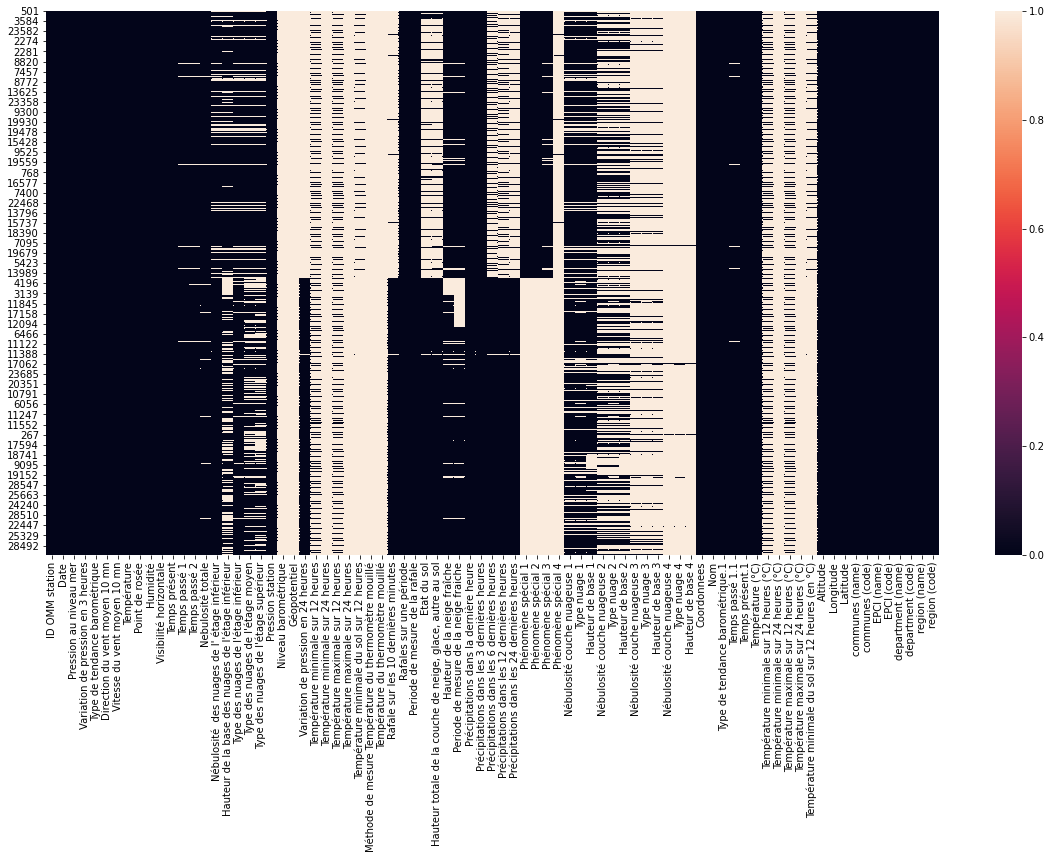

In [4]:
import seaborn as sns 

##exploration de donnees ## 
## analyse de forme ## 
print(mdata.shape)
plt.figure(figsize=(20,10))
sns.heatmap(mdata.isna())

In [5]:
mdata.dtypes.value_counts()

float64    66
object      9
int64       6
dtype: int64

In [6]:
int_var=[]
object_var=[]
float_var=[]
for col in mdata.select_dtypes('int64'):
    int_var.append(col)
    
for col in mdata.select_dtypes('object'):
    object_var.append(col)

for col in mdata.select_dtypes('float64'):
    float_var.append(col)
    
print("int_var ==>",int_var)
print("")
print("object_var ==>",object_var)
print("")
print("float_var ==>",float_var)

int_var ==> ['ID OMM station', 'Altitude', 'communes (code)', 'EPCI (code)', 'department (code)', 'region (code)']

object_var ==> ['Date', 'Temps passé 1', 'Coordonnees', 'Nom', 'Temps passé 1.1', 'communes (name)', 'EPCI (name)', 'department (name)', 'region (name)']

float_var ==> ['Pression au niveau mer', 'Variation de pression en 3 heures', 'Type de tendance barométrique', 'Direction du vent moyen 10 mn', 'Vitesse du vent moyen 10 mn', 'Température', 'Point de rosée', 'Humidité', 'Visibilité horizontale', 'Temps présent', 'Temps passé 2', 'Nebulosité totale', "Nébulosité  des nuages de l' étage inférieur", "Hauteur de la base des nuages de l'étage inférieur", "Type des nuages de l'étage inférieur", "Type des nuages de l'étage moyen", "Type des nuages de l'étage supérieur", 'Pression station', 'Niveau barométrique', 'Géopotentiel', 'Variation de pression en 24 heures', 'Température minimale sur 12 heures', 'Température minimale sur 24 heures', 'Température maximale sur 12 heures',

In [7]:
pd.set_option('display.max_column',81) ##affichage de toutes les variables 
pd.set_option('display.max_row',81)

nan   = (round(mdata.isna().sum()/mdata.shape[0],3)).tolist()
colum  = mdata.columns.tolist()

# ---- Show all of that
df_nan=pd.DataFrame({'Columns':colum, 'Nan_ratio':nan})
display(df_nan)

,Columns,Nan_ratio
0,ID OMM station,0.000
1,Date,0.000
2,Pression au niveau mer,0.001
3,Variation de pression en 3 heures,0.000
4,Type de tendance barométrique,0.000
5,Direction du vent moyen 10 mn,0.000
6,Vitesse du vent moyen 10 mn,0.000
7,Température,0.000
8,Point de rosée,0.001
9,Humidité,0.001


In [8]:
pourcentage_nan=round(mdata.isna().sum()/mdata.shape[0],3)
mdata2=mdata.columns[(pourcentage_nan > 0.50 )]
mdata2

Index(['Niveau barométrique', 'Géopotentiel',
       'Température minimale sur 12 heures',
       'Température minimale sur 24 heures',
       'Température maximale sur 12 heures',
       'Température maximale sur 24 heures',
       'Température minimale du sol sur 12 heures',
       'Méthode de mesure Température du thermomètre mouillé',
       'Température du thermomètre mouillé', 'Phénomène spécial 1',
       'Phénomène spécial 2', 'Phénomène spécial 3', 'Phénomène spécial 4',
       'Nébulosité couche nuageuse 2', 'Type nuage 2', 'Hauteur de base 2',
       'Nébulosité couche nuageuse 3', 'Type nuage 3', 'Hauteur de base 3',
       'Nébulosité couche nuageuse 4', 'Type nuage 4', 'Hauteur de base 4',
       'Température minimale sur 12 heures (°C)',
       'Température minimale sur 24 heures (°C)',
       'Température maximale sur 12 heures (°C)',
       'Température maximale sur 24 heures (°C)',
       'Température minimale du sol sur 12 heures (en °C)'],
      dtype='object')

In [10]:
from sklearn.preprocessing import *

def encoder(data):
    dicti={
        'Averse(s)':0,
        'Brouillard ou brouillard glacé ou brume sèche épaisse':1,
        'Bruine':2,
        'Neige, ou pluie et neige mêlées':3,
        'Nuages couvrant plus de la moitié du ciel pendant toute la période considérée':4,
        'Nuages couvrant plus de la moitié du ciel pendant une partie de la période considérée et couvrant la moitié du ciel, ou moins, pendant l’autre partie':5,
        'Nuages ne couvrant pas plus de la moitié du ciel pendant toute la période considérée':6,
        'Orage(s) avec ou sans précipitations':7,
        'Pluie':8,
        }
         
    for col in data.select_dtypes('object'):
            data[col]=data[col].map(dicti)
    
    return data 
    
    
    

def imputation(data):
    pourcentage_nan=round(data.isna().sum()/data.shape[0],3)
    mdata2=data.columns[(pourcentage_nan > 0.50 )]
    data.drop(mdata2,axis=1,inplace=True)
    data.drop(['communes (code)','EPCI (code)','department (code)','region (code)','Latitude','Longitude','Altitude'],axis=1,inplace=True)
    data.interpolate(inplace=True)
    data.dropna(axis=0,inplace=True)
    return data
    

    

def standarize(data):
    transf=StandardScaler()
    transf.fit(data)
    data_tr=transf.transform(data)
    return data_tr 
 
def preprocessing(data):
    #data.drop(['Coordonnees','communes (name)','EPCI (name)','department (name)','region (name)'],axis=0,inplace=True)
    #data.drop(['communes (code)','EPCI (code)','department (code)','region (name)','Latitude','Longitude','Altitude'],inplace=True)
    encoder(data)
    imputation(data)
    standarize(data)
    
    return data 

data_vs=preprocessing(mdata)
data_vs.head(10)


,ID OMM station,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,Visibilité horizontale,Temps présent,Temps passé 1,Temps passé 2,Nebulosité totale,Nébulosité des nuages de l' étage inférieur,Hauteur de la base des nuages de l'étage inférieur,Type des nuages de l'étage inférieur,Type des nuages de l'étage moyen,Type des nuages de l'étage supérieur,Pression station,Variation de pression en 24 heures,Rafale sur les 10 dernières minutes,Rafales sur une période,Periode de mesure de la rafale,Etat du sol,"Hauteur totale de la couche de neige, glace, autre au sol",Hauteur de la neige fraîche,Periode de mesure de la neige fraiche,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures,Précipitations dans les 6 dernières heures,Précipitations dans les 12 dernières heures,Précipitations dans les 24 dernières heures,Nébulosité couche nuageuse 1,Type nuage 1,Hauteur de base 1,Type de tendance barométrique.1,Temps passé 1.1,Temps présent.1,Température (°C)
15068,7481,101110.0,100.0,1.0,330.0,2.8,277.45,275.75,89.0,19780.0,0.0,4.0,2.0,100.0,8.0,159.170561,35.5,60.244444,59.090909,98180.0,500.0,4.5,4.5,-10.0,1.0,0.0,0.0,-59.965464,0.0,0.0,-0.1,-0.1,-0.1,8.0,7.0,270.0,1.0,4.0,0.0,4.3
235,7481,101070.0,-30.0,8.0,330.0,4.5,277.85,275.35,84.0,20000.0,2.0,4.0,2.0,100.0,8.0,168.341121,35.0,59.488889,58.181818,98150.0,490.0,6.0,6.5,-10.0,1.0,0.0,0.0,-59.930929,0.0,0.0,0.0,-0.1,-0.1,1.0,7.0,300.0,8.0,4.0,2.0,4.7
9005,7481,101100.0,30.0,3.0,350.0,5.1,277.85,275.05,82.0,12000.0,3.0,4.0,2.0,100.0,8.0,177.511682,35.0,58.733333,57.272727,98180.0,420.0,6.8,6.9,-10.0,1.0,0.0,0.0,-59.896393,0.0,0.0,0.0,-0.1,-0.1,5.0,7.0,450.0,3.0,4.0,3.0,4.7
4223,7481,101240.0,120.0,1.0,320.0,4.1,276.85,275.25,89.0,20000.0,1.0,4.0,2.0,100.0,8.0,186.682243,35.0,57.977778,56.363636,98300.0,380.0,5.6,8.0,-10.0,1.0,0.0,0.0,-59.861857,0.0,0.8,0.8,0.8,0.8,5.0,6.0,330.0,1.0,4.0,1.0,3.7
1138,7481,101320.0,80.0,1.0,330.0,4.5,276.85,274.35,84.0,20000.0,3.0,4.0,2.0,100.0,8.0,195.852804,35.0,57.222222,55.454545,98380.0,340.0,6.2,6.3,-10.0,1.0,0.0,0.0,-59.827322,0.0,-0.1,0.8,0.8,0.8,8.0,6.0,450.0,1.0,4.0,3.0,3.7
1139,7481,101360.0,30.0,1.0,330.0,4.9,276.35,274.25,86.0,40000.0,3.0,4.0,2.0,100.0,8.0,205.023364,35.0,56.466667,54.545455,98410.0,350.0,6.5,6.6,-10.0,1.0,0.0,0.0,-59.792786,0.0,0.0,-0.1,0.8,0.8,8.0,6.0,300.0,1.0,4.0,3.0,3.2
24473,7481,101410.0,50.0,1.0,320.0,4.3,275.75,274.85,94.0,6000.0,51.0,2.0,5.0,100.0,8.0,214.193925,37.0,55.711111,53.636364,98460.0,370.0,6.0,7.5,-10.0,2.0,0.0,0.0,-59.758250,-0.1,-0.1,-0.1,0.8,0.8,8.0,7.0,150.0,1.0,2.0,51.0,2.6
1814,7481,101460.0,50.0,3.0,330.0,4.0,276.05,274.85,92.0,12000.0,2.0,4.0,2.0,100.0,8.0,223.364486,37.0,54.955556,52.727273,98510.0,430.0,5.7,5.9,-10.0,1.0,0.0,0.0,-59.723715,0.0,-0.1,-0.1,-0.1,0.8,8.0,7.0,180.0,3.0,4.0,2.0,2.9
20475,7481,101530.0,70.0,1.0,330.0,4.2,276.55,274.95,89.0,15000.0,21.0,8.0,5.0,100.0,8.0,232.535047,37.0,54.200000,51.818182,98580.0,400.0,5.5,6.1,-10.0,1.0,0.0,0.0,-59.689179,-0.1,-0.1,-0.1,-0.1,0.8,8.0,7.0,270.0,1.0,8.0,21.0,3.4
3123,7481,101480.0,-40.0,8.0,340.0,4.8,277.15,275.15,87.0,16690.0,0.0,4.0,2.0,100.0,8.0,241.705607,36.5,53.444444,50.909091,98540.0,390.0,6.4,7.1,-10.0,1.0,0.0,0.0,-59.654643,0.0,0.0,-0.1,-0.1,0.8,8.0,7.0,270.0,8.0,4.0,0.0,4.0


In [14]:
from sklearn.preprocessing import *
from sklearn.model_selection import *
train_set,test_set=train_test_split(data_vs,train_size=0.8,random_state=0)
print("train_shape =>",train_set.shape)
print("test_shape =>",test_set.shape)


sequence_len     = 16
batch_size       = 32
data_train=train_set.to_numpy()
data_test=test_set.to_numpy()
train_gener =  tf.keras.preprocessing.sequence.TimeseriesGenerator(data_train, data_train,length=sequence_len,  batch_size=batch_size)
test_gener  =  tf.keras.preprocessing.sequence.TimeseriesGenerator(data_test,  data_test,  length=sequence_len,  batch_size=batch_size)

train_shape => (11854, 40)
test_shape => (2964, 40)


In [15]:
## model ##
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16,40)),
    tf.keras.layers.LSTM(100,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(40),
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 40)                4040      
                                                                 
Total params: 60,440
Trainable params: 60,440
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',
            loss='mse',
            metrics='mae')

In [17]:
history=model.fit(train_gener,validation_data=test_gener,epochs=10)

Epoch 1/10
370/370 [==============================] - 44s 95ms/step - loss: 265550320.0000 - mae: 9340.0596 - val_loss: 11666285.0000 - val_mae: 1556.4648
Epoch 2/10
370/370 [==============================] - 25s 68ms/step - loss: 44880232.0000 - mae: 4095.4199 - val_loss: 10016665.0000 - val_mae: 1141.3025
Epoch 3/10
370/370 [==============================] - 37s 100ms/step - loss: 27882298.0000 - mae: 2490.1753 - val_loss: 9865926.0000 - val_mae: 1038.9399
Epoch 4/10
370/370 [==============================] - 43s 117ms/step - loss: 21839370.0000 - mae: 1836.1260 - val_loss: 8775984.0000 - val_mae: 920.0034
Epoch 5/10
370/370 [==============================] - 31s 85ms/step - loss: 20851968.0000 - mae: 1579.8456 - val_loss: 8949721.0000 - val_mae: 837.1151
Epoch 6/10
370/370 [==============================] - 39s 106ms/step - loss: 18980524.0000 - mae: 1449.5099 - val_loss: 8668416.0000 - val_mae: 816.2001
Epoch 7/10
370/370 [==============================] - 39s 104ms/step - loss: 19

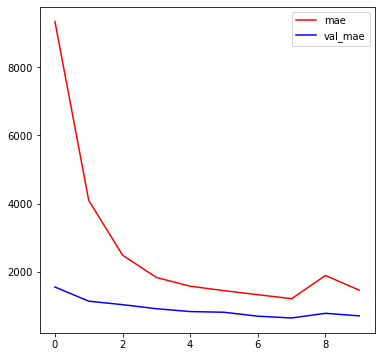

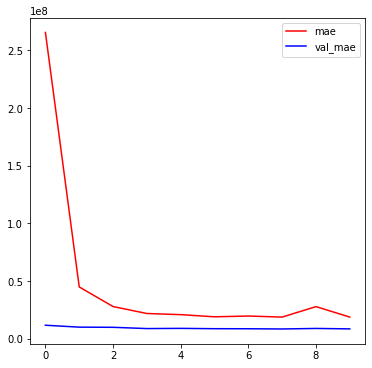

In [18]:
plt.figure(figsize=(6,6))
plt.plot(history.history['mae'],c='r',label='mae')
plt.plot(history.history['val_mae'],c='b',label='val_mae')
plt.legend()

plt.figure(figsize=(6,6))
plt.plot(history.history['loss'],c='r',label='mae')
plt.plot(history.history['val_loss'],c='b',label='val_mae')
plt.legend()

In [19]:
import random 
s=random.randint(0,len(test_set)-sequence_len)

sequence      = test_set[s:s+sequence_len]
sequence_true = test_set[s:s+sequence_len+1]

pred = model.predict( np.array([sequence]))
print("sequence_donnees =>",sequence)
print("")
print("vraie_squence",sequence_true)
print("")
print("prediction",pred)

sequence_donnees =>        ID OMM station  Pression au niveau mer  \
10438            7481                101570.0   
4466             7481                101540.0   
19153            7481                101500.0   
17730            7481                101230.0   
469              7481                101210.0   
18163            7481                100920.0   
28119            7481                101880.0   
18860            7481                100200.0   
3523             7481                102930.0   
14349            7481                100890.0   
25210            7481                101010.0   
441              7481                103360.0   
8408             7481                101690.0   
24721            7481                100730.0   
5617             7481                100220.0   
8631             7481                101900.0   

       Variation de pression en 3 heures  Type de tendance barométrique  \
10438                              100.0                            0.0